In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [3]:
names= {'A': 'Alice',
        'B': 'Bob',
        'C': 'Carl ',
        'D': 'David',
        'E': 'Ernst',
        'F': 'Frank',
        'G': 'Gail',
        'H': 'Harry',
        'I': 'Irene',
        'J': 'Jen'}

V = ['Alice', 'Bob', 'Carl ', 'David', 'Ernst', 'Frank', 'Gail', 'Harry', 'Irene', 'Jen']

E = [
        ("Alice", "Bob"  ), ("Bob"  , "Gail" ), ("Irene", "Gail")  ,
        ("Carl" , "Alice"), ("Gail" , "Harry"), ("Irene", "Jen")   ,
        ("Alice", "David"), ("Harry", "Jen"  ), ("Ernst", "Frank") ,
        ("Alice", "Ernst"), ("Jen"  , "Gail" ), ("David", "Carl"  ),
        ("Alice", "Frank"), ("Harry", "Irene"), ("Carl" , "Frank" ),
        ]


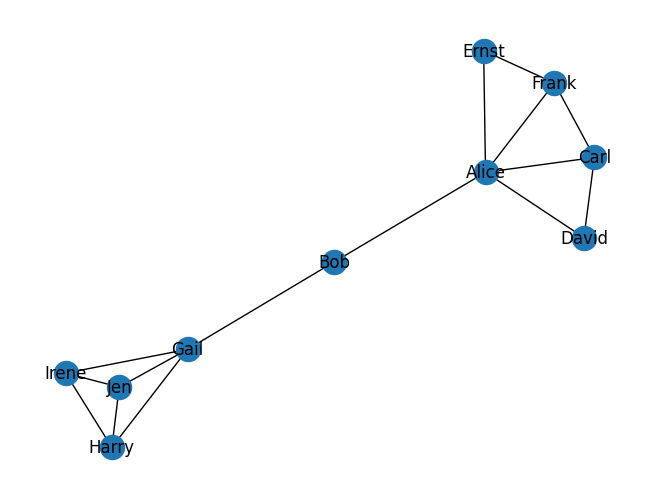

In [4]:
g = nx.Graph()
g.add_edges_from(E)
nx.draw(g, with_labels = True)

In [5]:
list(nx.common_neighbors(g, "Alice", "Bob"))

[]

# Graph

\begin{gather}
    G = (V, E)
\end{gather}
where:
- V: set of vertices
- E: set of edges

## Number of edges N:

\begin{gather}
    N = |V|
\end{gather}

## Density

for undirection grph
\begin{gather}
    Density = \frac{|E|}{\binom{N}{2}} = \frac{2|E|}{N(N-1)} \\
    Density = \frac{2 \cdot 15}{10 \cdot 9} = \frac{1}{3}
\end{gather}

In [6]:
N = len(V)
N

10

In [7]:
nx.density(g)

0.3333333333333333

## Degree

Degree: nr of edges adjacent to the note
\begin{gather}
    Degree(A) = 5
\end{gather}

In [8]:
g.degree

DegreeView({'Alice': 5, 'Bob': 2, 'Gail': 4, 'Irene': 3, 'Carl': 3, 'Harry': 3, 'Jen': 3, 'David': 2, 'Ernst': 2, 'Frank': 3})

Who is the most central node according to this measure?
**Alice**

## Clastering coefficient

\begin{gather}
    C_i = \frac{\delta|\{ e_{ij}: v_i,v_j \in N_i, e_{ij}\in E  \}|}{k_i(k_i-1)}
\end{gather}
where
- $\delta =$ 2 if undirected, 1 if directed,
- $N_i = \{ v_j: e_{ij} \in E \lor e_{ji} \in E \}$,
- $k_i = |N_i|$

\begin{gather}
    C_A = \frac{2\cdot3}{5\cdot4}=\frac{3}{10},\quad C_B = 0,\quad C_E = 1
\end{gather}

In [9]:
nx.clustering(g)

{'Alice': 0.3,
 'Bob': 0,
 'Gail': 0.5,
 'Irene': 1.0,
 'Carl': 0.6666666666666666,
 'Harry': 1.0,
 'Jen': 1.0,
 'David': 1.0,
 'Ernst': 1.0,
 'Frank': 0.6666666666666666}

# Closseness coeffiecient
A clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together
\begin{gather}
    C(v) = \frac{N-1}{\sum_y{ d(y,v) }}\\
    C(A) = \frac{10-1}{1\cdot5+1\cdot2+3\cdot3}=\frac{9}{16}\\
    C(B) = \frac{10-1}{1\cdot2+2\cdot7}=\frac{9}{16}\\
    C(C) = \frac{10-1}{1\cdot3+2\cdot2+1\cdot3+3\cdot4}=\frac{9}{22}
\end{gather}


In [10]:
nx.closeness.closeness_centrality(g)

{'Alice': 0.5625,
 'Bob': 0.5625,
 'Gail': 0.5,
 'Irene': 0.375,
 'Carl': 0.4090909090909091,
 'Harry': 0.375,
 'Jen': 0.375,
 'David': 0.391304347826087,
 'Ernst': 0.391304347826087,
 'Frank': 0.4090909090909091}

Who is the most central node according to this measure? **Alice, Bob**

## Betweenness coeffiecient

\begin{gather}
    B(v) = \sum_{s\neq v\neq t}\frac{\sigma_{st}(v)}{\sigma_{st}}
\end{gather}
where:
- $\sigma_{st}$: # of shortest path betwen s abd t
- $\sigma_{st}(v)$: ---||--- that pass throwgh v (not where v is an end ppoint)

In [11]:
nx.betweenness_centrality(g,normalized = False)

{'Alice': 22.0,
 'Bob': 20.0,
 'Gail': 18.0,
 'Irene': 0.0,
 'Carl': 0.5,
 'Harry': 0.0,
 'Jen': 0.0,
 'David': 0.0,
 'Ernst': 0.0,
 'Frank': 0.5}

Who is the most central node according to this measure? **Alice**

# zad 2

In [12]:
import csv

In [13]:
with open('zad2_a', 'w') as f:
    write = csv.writer(f)
    write.writerows(E)

# zad 3

In [14]:
M = nx.adjacency_matrix(g).todense()
M

array([[0, 1, 0, 0, 1, 0, 0, 1, 1, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0]])

## a)

\begin{gather}
        M \times [1]_{N\times1} = k
\end{gather} 

where|
- k: vector of degres

In [15]:
M @ np.ones([N,1])

array([[5.],
       [2.],
       [4.],
       [3.],
       [3.],
       [3.],
       [3.],
       [2.],
       [2.],
       [3.]])

## b)

\begin{gather}
        \frac{[1]_{1\times N} \times  M \times [1]_{N\times1}}{2} = L
\end{gather}
where
- L: nr. of links

## c)

\begin{gather}
        M^2= N
\end{gather}
where
- $N$: matrix whose element $n_{ij}$ is equal to the number of common neighbors of nodes $i$ and $j$

In [16]:
M@M

array([[5, 0, 1, 0, 2, 0, 0, 1, 1, 2],
       [0, 2, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 4, 2, 0, 2, 2, 0, 0, 0],
       [0, 1, 2, 3, 0, 2, 2, 0, 0, 0],
       [2, 1, 0, 0, 3, 0, 0, 1, 2, 1],
       [0, 1, 2, 2, 0, 3, 2, 0, 0, 0],
       [0, 1, 2, 2, 0, 2, 3, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 2, 1, 2],
       [1, 1, 0, 0, 2, 0, 0, 1, 2, 1],
       [2, 1, 0, 0, 1, 0, 0, 2, 1, 3]])

## D 

\begin{gather}
        \frac{tr(M^3)}{6}= T
\end{gather}
where
- $T$: number of triangles present in the network

In [17]:
np.array([[0,1,1],[1,0,1],[1,1,0]])@np.array([[0,1,1],[1,0,1],[1,1,0]]),np.array([[0,1,1],[1,0,1],[1,1,0]])

(array([[2, 1, 1],
        [1, 2, 1],
        [1, 1, 2]]),
 array([[0, 1, 1],
        [1, 0, 1],
        [1, 1, 0]]))

We check if the $v_i,v_j$ are common neighbors and then check if $v_i,v_j$ are connected.


On the diagonal, we have the number of triangles, but we need to remember that every triangle is added more than one time.


In a adjacency matrix, we can represent a triangle in 3! possible way.

That's why we have to divide the trace of the obtained matrix by 6.

In [18]:
np.array([[0,1,1],[1,0,1],[1,1,0]])@np.array([[0,1,1],[1,0,1],[1,1,0]])@np.array([[0,1,1],[1,0,1],[1,1,0]])

array([[2, 3, 3],
       [3, 2, 3],
       [3, 3, 2]])

# e


We can see the cage (but sometime in is not that easy). 


b)
If the graph is connected, then exist a path that goes through all of the nodes.